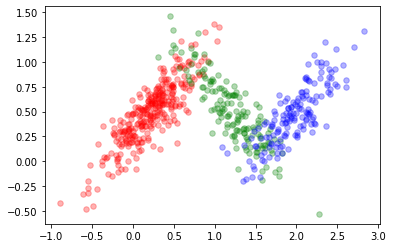

In [9]:
import os,sys
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

D = 2
K = 3
n = [300, 150, 150] # 3类样本数
N = np.sum(n)
mu_true = np.array([[0.2,0.5],
           [1.2,0.5],
           [2.0,0.5]])
sigma_true = np.array([[[0.1, 0.085], [0.085, 0.1]],
             [[0.1, -0.085], [-0.085, 0.1]],
             [[0.1, 0.085], [0.085, 0.1]]])

np.random.seed(50)
data = np.zeros(shape = [N, D])
color_dict = {0: "r", 1: "g", 2: "b"}
# 给定均值和方差，生成3组服从2维高斯分布的数据
# 同时绘制数据
for i in range(K):
  if n[0:i] == []:
    l = 0
  else:
    l = np.sum(n[0:i])
  r = np.sum(n[0:i+1])
  data[l:r] = np.random.multivariate_normal(mu_true[i], sigma_true[i], size = n[i])
  plt.scatter(data[l:r][:,0], data[l:r][:, 1], s = 30, c = color_dict[i], alpha = 0.3)

[[ 2.56329896  1.27169439]
 [ 2.35810828  0.10091996]
 [ 1.2854779  -0.23503574]]


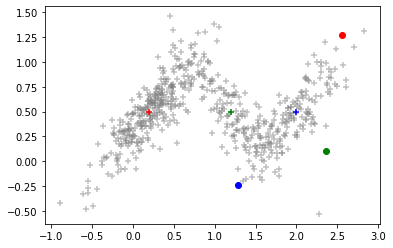

In [14]:
# 初始化mu 同时绘制
max_x, min_x = np.max(data[:, 0]), np.min(data[:, 0])
max_y, min_y = np.max(data[:, 1]), np.min(data[:, 1])

np.random.seed(70)
mu = np.zeros(shape = mu_true.shape)
mu[:,0], mu[:,1] = np.random.uniform(low = min_x, high = max_x, size = K),np.random.uniform(low = min_y, high = max_y, size = K) 
print(mu)

plt.figure()
plt.scatter(data[:,0], data[:,1], s = 30, c = "gray", alpha = 0.5, marker = "+")
for i in range(K):
  plt.scatter(mu[i,0], mu[i,1], c = color_dict[i], marker = "o")
  plt.scatter(mu_true[i,0], mu_true[i,1], c = color_dict[i], marker = "+")

[[ 2.56329896  1.27169439]
 [ 2.35810828  0.10091996]
 [ 1.2854779  -0.23503574]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


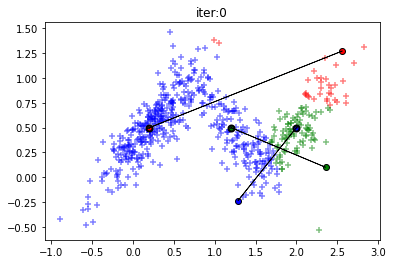

[[2.13350842 0.59996407]
 [1.37190177 0.37005118]
 [0.23519188 0.52135261]]


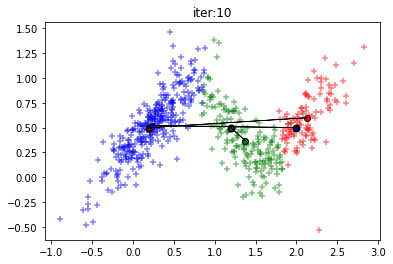

[[2.13350842 0.59996407]
 [1.3525124  0.39351673]
 [0.22106139 0.51098374]]


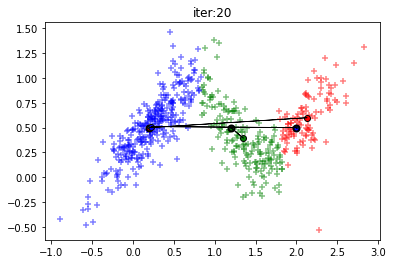

[[2.13350842 0.59996407]
 [1.3525124  0.39351673]
 [0.22106139 0.51098374]]


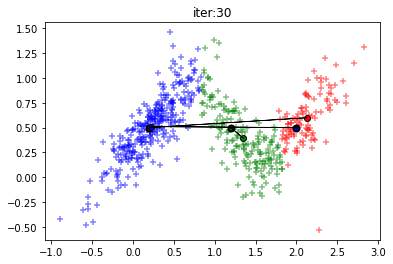

[[2.13350842 0.59996407]
 [1.3525124  0.39351673]
 [0.22106139 0.51098374]]


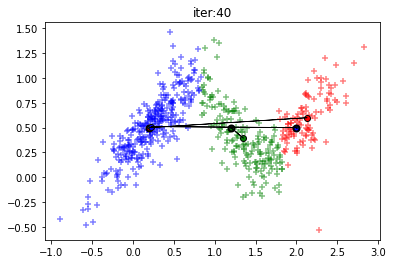

[[2.13350842 0.59996407]
 [1.3525124  0.39351673]
 [0.22106139 0.51098374]]


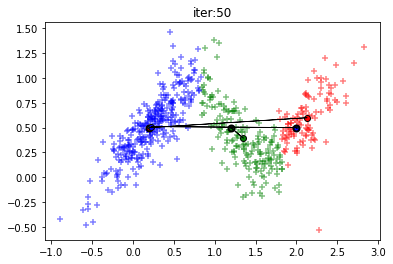

[[2.13350842 0.59996407]
 [1.3525124  0.39351673]
 [0.22106139 0.51098374]]


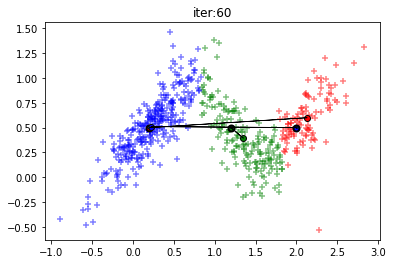

[[2.13350842 0.59996407]
 [1.3525124  0.39351673]
 [0.22106139 0.51098374]]


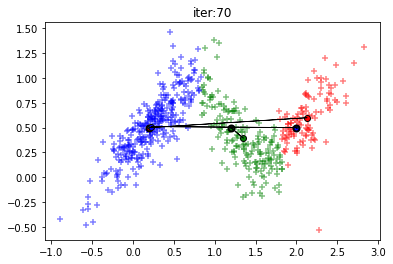

[[2.13350842 0.59996407]
 [1.3525124  0.39351673]
 [0.22106139 0.51098374]]


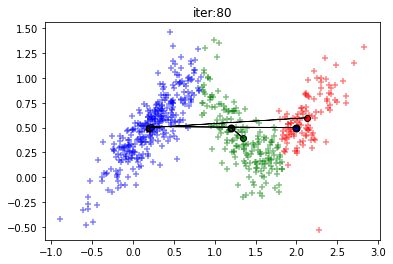

[[2.13350842 0.59996407]
 [1.3525124  0.39351673]
 [0.22106139 0.51098374]]


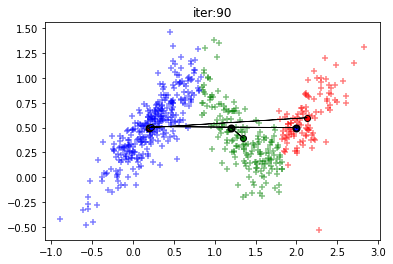

In [15]:
# k-means算法实现
from collections import Counter
iterations = 100
for iter in range(iterations):
  r = np.zeros(N)
  for i in range(N):
    r[i] = np.argmin([np.linalg.norm(data[i] - mu[k]) for k in range(K)])
  
  if iter % 10 == 0:
    print(mu)
    plt.figure()
    for i in range(N):
      plt.scatter(data[i, 0], data[i, 1], s = 30, c = color_dict[r[i]], alpha = 0.5, marker = "+")
    
    for i in range(K):
      ax = plt.axes()
      ax.arrow(mu[i, 0], mu[i, 1], mu_true[i, 0] - mu[i, 0], mu_true[i, 1] - mu[i, 1], lw = 0.8, head_width = 0.02)
      plt.scatter(mu[i,0], mu[i,1], c = color_dict[i], marker = "o", edgecolors = "k", linewidths=1)
      plt.scatter(mu_true[i, 0], mu_true[i, 1], c = color_dict[i], marker = "o", edgecolors = "k", linewidths=2)
  
    plt.title("iter:{}".format(iter))
    plt.show()
  
  mu_prev = mu.copy()
  # cnt = dict(Counter(r))
  # N_k = [cnt[k] for k in range(K)]
  mu = np.array([np.sum(data[r == k], axis = 0)/len(data[r == k]) for k in range(K)])
  diff = mu - mu_prev
  
